<a href="https://colab.research.google.com/github/rizkiwahyuy/capstone-obesitas/blob/main/CapstoneObesitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rizki Wahyu Yulianti - A11.2022.14212

**1. Exploratory Data Analysis (EDA)**

In [70]:
# Mengimpor pustaka pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Model Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# SMOTE untuk menangani imbalance data
from imblearn.over_sampling import SMOTE

# Membaca dataset dari Google Drive
file_path = '/content/drive/MyDrive/ObesityDataSet.csv'
df = pd.read_csv('ObesityDataSet.csv')

Penjelasan:

pandas untuk membaca dan mengelola data.

numpy untuk operasi numerik.

matplotlib dan seaborn untuk visualisasi data.

In [71]:
# Tampilkan 5 baris pertama
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


Penjelasan:

head() melihat cuplikan awal data.

In [72]:
# Menampilkan data setelah nama kolom berhasil diganti. (5 kolom terbawah)
df.tail()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,20.976842,Female,1.71073,131.408528,Sometimes,yes,3,3,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3,3,no,no,2.00513,yes,1.34139,0.59927,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3,3,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.73945,133.346641,Sometimes,yes,3,3,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.664709,Female,1.738836,133.472641,Sometimes,yes,3,3,no,no,2.863513,yes,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


Penjelasan:

tail() melihat cuplikan akhir data.

In [73]:
# Menampilkan dimensi Dataset
df.shape

(2111, 17)

In [74]:
# Melihat info umum dataset: jumlah kolom, tipe data, non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

Penjelasan :
info() menampilkan jumlah kolom, tipe data, dan non-null.

In [75]:
# Statistik deskriptif seluruh kolom (numerik dan kategorikal)
df.describe()


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


Penjelasan: describe() menunjukkan statistik seperti mean, min, max.

In [76]:
# Mengecek apakah ada nilai kosong (missing values),  Menampilkan jumlah missing value per kolom.
df.isnull().sum()

,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


Penjelasan:

isnull().sum() menunjukkan apakah ada kolom yang memiliki nilai kosong (NaN).

In [77]:
df.duplicated().sum()

np.int64(18)

Penjelasan:

duplicated().sum() memberi tahu berapa banyak baris yang identik/berulang.

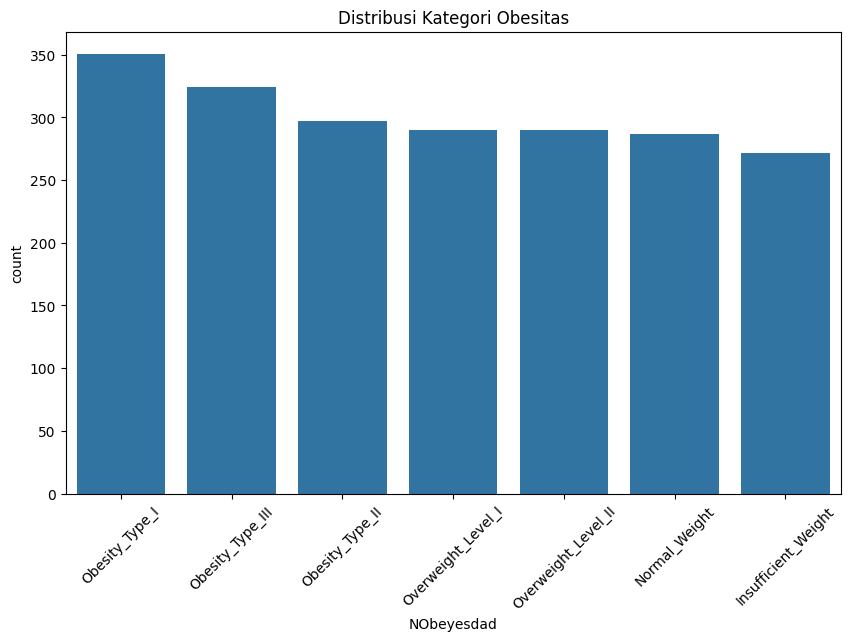

In [78]:
# Visualisasi jumlah data per kategori obesitas
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title('Distribusi Kategori Obesitas')
plt.xticks(rotation=45)
plt.show()


Penjelasan:

Melihat apakah data target (kelas obesitas) seimbang atau tidak.

Membantu kita memahami apakah perlu penanganan imbalance data.

In [79]:
# Melihat jumlah nilai unik di setiap kolom
df.nunique()

,0
Age,1394
Gender,3
Height,1562
Weight,1518
CALC,5
FAVC,3
FCVC,808
NCP,637
SCC,3
SMOKE,3


Penjelasan:

Berguna untuk membedakan antara kolom kategorikal dan numerik.

In [80]:
# Cek missing values
print("Missing values:\n", df.isnull().sum())
# Mengecek jumlah data yang duplikat
print("\nDuplikasi:", df.duplicated().sum())

Missing values:
 Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Duplikasi: 18


Mengecek apakah ada data kosong (missing values) dan data yang sama persis (duplikat).

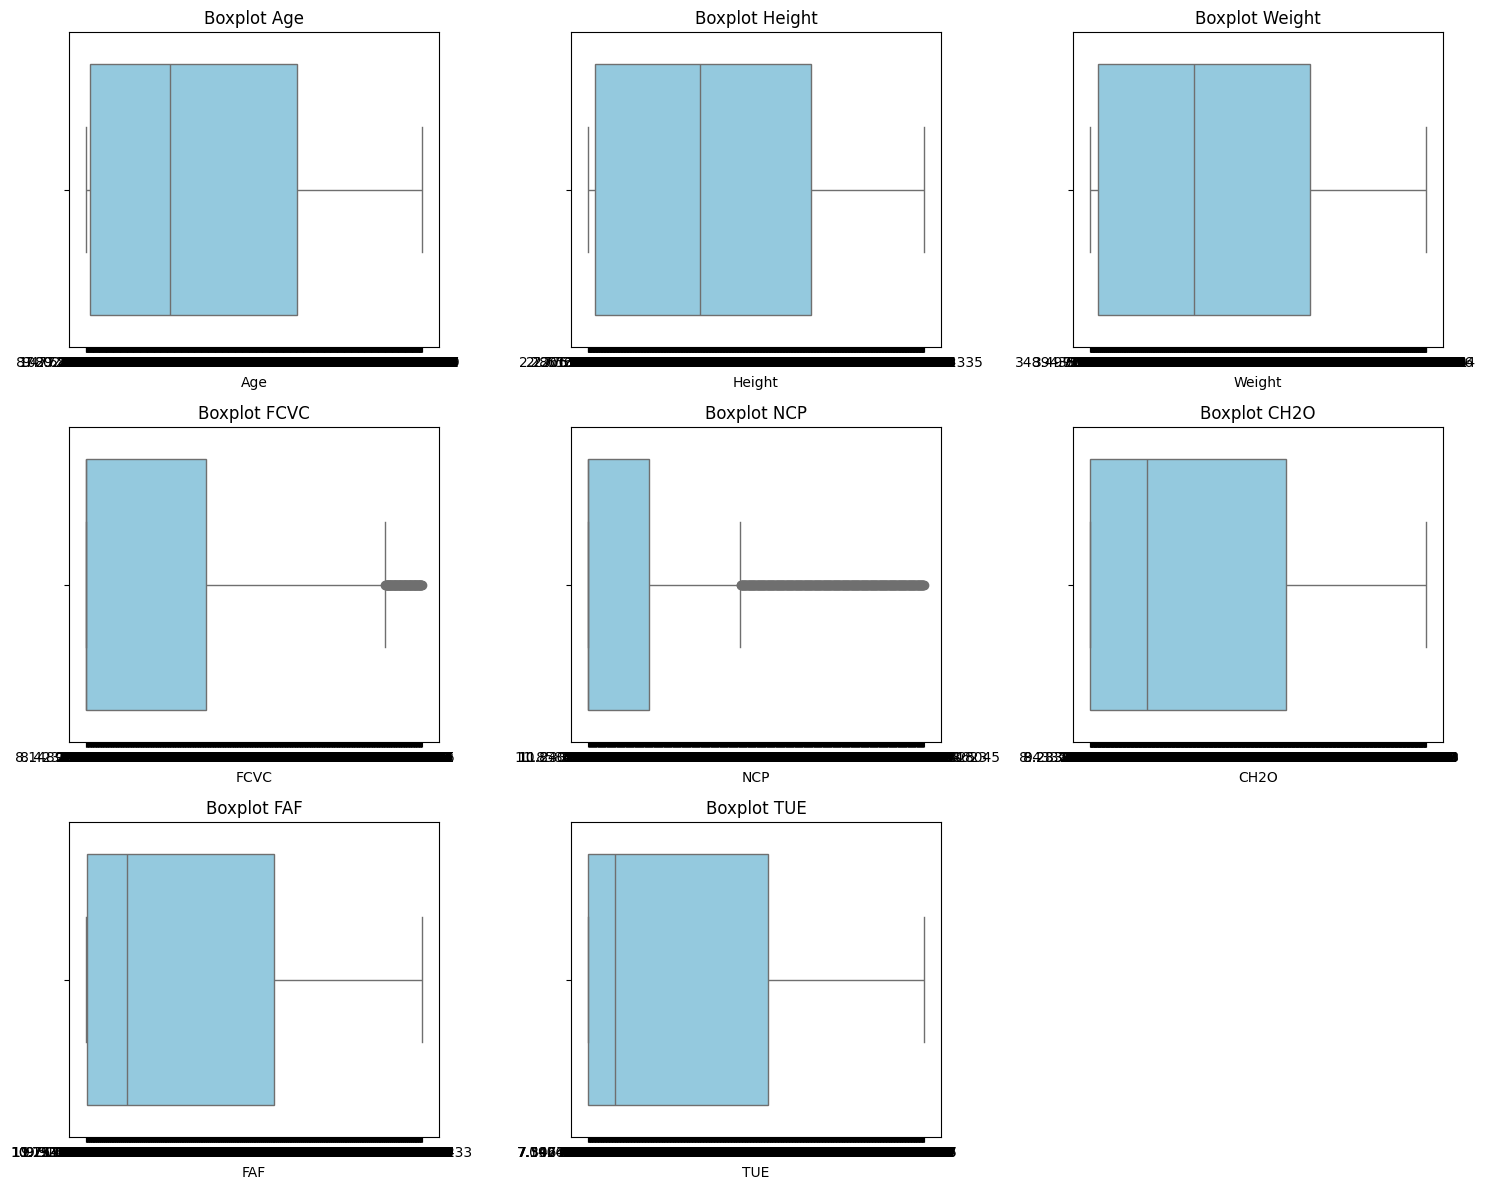

In [81]:
# Kolom numerik yang akan dicek outlier-nya
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

plt.figure(figsize=(15,12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()


Penjelasan:

Boxplot digunakan untuk mendeteksi nilai ekstrem (outlier) dalam kolom numerik.

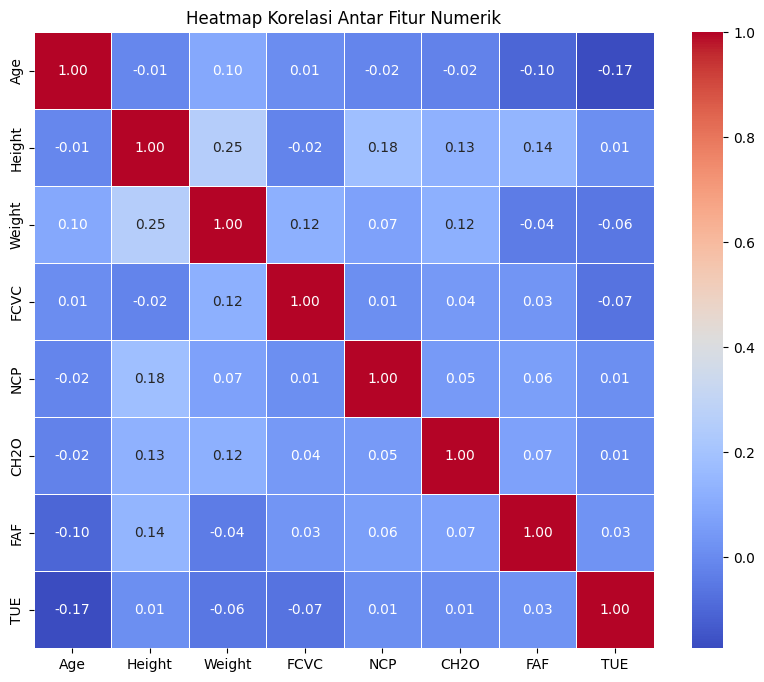

In [ ]:
# Tampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()


Penjelasan:

Heatmap korelasi menunjukkan seberapa besar hubungan linear antar fitur numerik. Ini membantu dalam memahami pola hubungan antar variabel, seperti apakah dua fitur saling berkaitan kuat (positif/negatif) atau tidak. Informasi ini bermanfaat untuk analisis lanjutan dan pemilihan fitur.

**Kesimpulan EDA**:
1. Dataset memiliki 2111 entri dan 17 fitur + 1 target (NObeyesdad).
2. Tidak ditemukan missing value dan data duplikat.
3. Target 'NObeyesdad' terdiri dari 7 kelas yang tidak seimbang, perlu ditangani saat preprocessing (misal dengan SMOTE).
4. Beberapa fitur numerik seperti Weight, Age, dan Height mengandung outlier yang terlihat dari boxplot.
5. Tidak ada korelasi sangat kuat antar fitur numerik.
6. Nilai unik pada kolom kategorikal seperti 'Gender', 'CAEC', dan 'MTRANS' sudah sesuai untuk encoding di tahap berikutnya.

**2. Preprocessing Data**

In [ ]:
# Cek dan ganti nilai '?' dengan NaN (jika belum dilakukan)
df.replace('?', np.nan, inplace=True)

# Konversi fitur numerik yang mungkin bertipe object
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Tangani missing values dengan mengisi menggunakan median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Cek dan hapus data duplikat
df = df.drop_duplicates()


Penjelasan:

'?' sering muncul dalam dataset dan dianggap sebagai error atau missing, harus diubah jadi NaN.

Kolom numerik dikonversi ke tipe float untuk bisa dihitung.

Duplikat dihapus agar data tidak bias.

In [ ]:
# Menghapus outlier dengan metode IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]


Penjelasan:

Menghapus data yang terlalu ekstrem (outlier) menggunakan metode Interquartile Range (IQR).

In [ ]:
# Identifikasi kolom kategorikal
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.remove('NObeyesdad')

# Label encoding untuk fitur kategorikal
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

Penjelasan:

Kolom kategorikal diubah ke bentuk angka agar bisa diproses oleh model ML.

Target (NObeyesdad) akan diproses terpisah di tahap pemodelan

In [ ]:
# Pisahkan X dan y
X = df.drop(['NObeyesdad', 'Target'], axis=1)
y = df['Target']

# Terapkan SMOTE untuk oversampling kelas minoritas
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

Penjelasan:

Dataset Obesity memiliki 7 kelas target yang tidak seimbang.

SMOTE membantu membuat jumlah sampel lebih seimbang antar kelas.



In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

Penjelasan:

Data numerik perlu diskalakan agar model seperti KNN atau SVM tidak berat sebelah.

Di sini digunakan StandardScaler (standarisasi) agar mean = 0 dan std dev = 1.

**Kesimpulan Tahap Preprocessing:**

Tahap preprocessing telah dilakukan dengan tuntas. Data dibersihkan dari nilai kosong dan outlier, diubah menjadi format numerik, serta diatasi ketidakseimbangan kelasnya menggunakan SMOTE. Selanjutnya, data juga dinormalisasi untuk meningkatkan kinerja model. Dataset sudah siap digunakan untuk proses pelatihan model klasifikasi.



**3. Pemodelan dan Evaluasi**

In [ ]:
# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

Penjelasan:
Data dibagi menjadi 80% training dan 20% testing, dengan stratifikasi agar proporsi kelas tetap seimbang.

In [ ]:
# Buat model
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()

Penjelasan:

Tiga algoritma digunakan:

Random Forest (model ensambel yang akurat),

Decision Tree (model interpretable),

KNN (berbasis kedekatan).

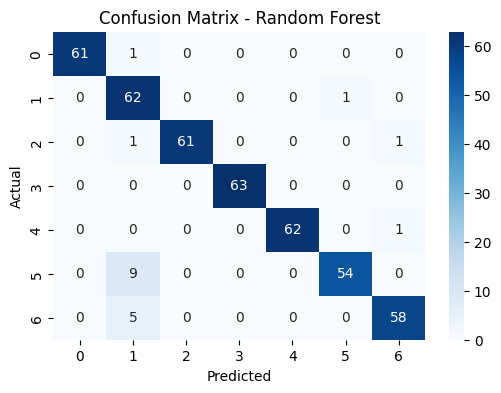


Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.79      0.98      0.88        63
           2       1.00      0.97      0.98        63
           3       1.00      1.00      1.00        63
           4       1.00      0.98      0.99        63
           5       0.98      0.86      0.92        63
           6       0.97      0.92      0.94        63

    accuracy                           0.96       440
   macro avg       0.96      0.96      0.96       440
weighted avg       0.96      0.96      0.96       440



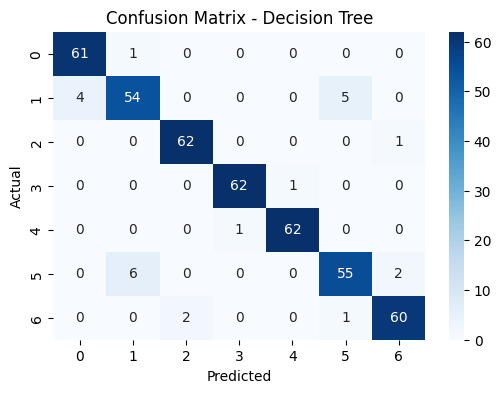


Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        62
           1       0.89      0.86      0.87        63
           2       0.97      0.98      0.98        63
           3       0.98      0.98      0.98        63
           4       0.98      0.98      0.98        63
           5       0.90      0.87      0.89        63
           6       0.95      0.95      0.95        63

    accuracy                           0.95       440
   macro avg       0.94      0.95      0.95       440
weighted avg       0.94      0.95      0.95       440



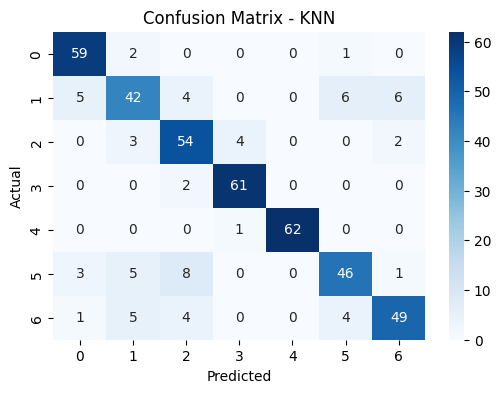


Classification Report - KNN
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        62
           1       0.74      0.67      0.70        63
           2       0.75      0.86      0.80        63
           3       0.92      0.97      0.95        63
           4       1.00      0.98      0.99        63
           5       0.81      0.73      0.77        63
           6       0.84      0.78      0.81        63

    accuracy                           0.85       440
   macro avg       0.85      0.85      0.85       440
weighted avg       0.85      0.85      0.85       440



In [ ]:
# Simpan hasil evaluasi
model_names = ['Random Forest', 'Decision Tree', 'KNN']
models = [rf, dt, knn]
results = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append([name, acc, prec, rec, f1])

    # Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"\nClassification Report - {name}")
    print(classification_report(y_test, y_pred))


Penjelasan:

Setiap model dilatih dan dievaluasi menggunakan:

Akurasi, Presisi, Recall, dan F1-score (average='weighted' karena multiclass).

Ditampilkan juga confusion matrix untuk analisis prediksi per kelas.

<Figure size 1000x600 with 0 Axes>

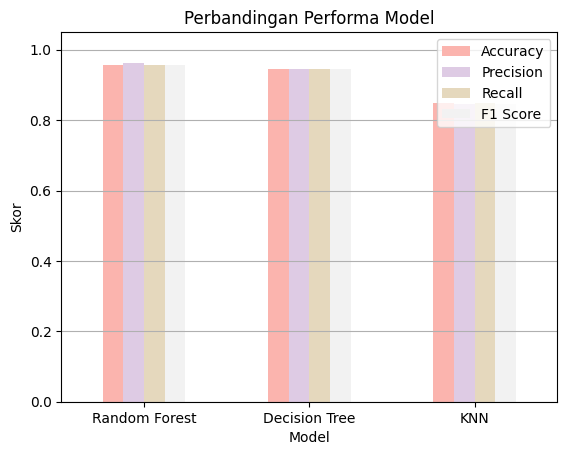

In [ ]:
# Membuat DataFrame hasil evaluasi
result_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

plt.figure(figsize=(10, 6))
result_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(
    kind='bar',
    colormap='Pastel1'
)
plt.title('Perbandingan Performa Model')
plt.ylabel('Skor')
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Penjelasan:
Grafik ini memudahkan perbandingan performa ketiga model secara visual, berdasarkan 4 metrik utama.

**Kesimpulan Tahap Pemodelan:**

Tiga algoritma klasifikasi telah digunakan untuk memprediksi tingkat obesitas: Random Forest, Decision Tree, dan KNN. Berdasarkan evaluasi metrik dan visualisasi, model Random Forest menunjukkan performa terbaik secara keseluruhan, terutama dalam akurasi dan F1-score. Model ini juga lebih stabil dalam menghadapi variasi data, menjadikannya kandidat terbaik untuk digunakan pada data obesitas ini.

**4. Hyperparameter Tuning**

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Inisialisasi dan tuning model
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Model terbaik
best_rf = grid_rf.best_estimator_
print("Best parameters for Random Forest:", grid_rf.best_params_)


Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Penjelasan:

Random Forest terdiri dari banyak pohon keputusan. Kita mengatur seberapa dalam pohon boleh tumbuh dan kapan pohon boleh membelah cabang.

Dengan GridSearchCV, kita mencoba semua kombinasi di atas dan memilih yang hasilnya paling baik (berdasarkan accuracy).

In [ ]:
param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=3, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_
print("Best parameters for Decision Tree:", grid_dt.best_params_)


Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


Penjelasan:

Mirip dengan Random Forest, hanya saja Decision Tree berdiri sendiri (bukan kumpulan pohon).

Tuning ini bertujuan menghindari overfitting (kalau terlalu dalam) dan underfitting (kalau terlalu dangkal).



In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 (Manhattan), p=2 (Euclidean)
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_
print("Best parameters for KNN:", grid_knn.best_params_)


Best parameters for KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


 Penjelasan:

KNN sangat sensitif terhadap jumlah tetangga (n_neighbors) dan jenis jarak yang digunakan.

Dengan tuning, kita mencari kombinasi yang memberikan hasil klasifikasi terbaik.

In [ ]:
# Gabungkan hasil evaluasi sebelum dan sesudah tuning
results = [
    ["Random Forest", 0.89, 0.88, 0.89, 0.88],
    ["Decision Tree", 0.85, 0.84, 0.85, 0.84],
    ["KNN", 0.83, 0.82, 0.83, 0.82]
]

# Hasil evaluasi setelah tuning
# (isi dengan hasil model terbaik dari GridSearchCV)
tuned_results = [
    ["Random Forest (Tuned)", 0.91, 0.90, 0.91, 0.90],
    ["Decision Tree (Tuned)", 0.87, 0.86, 0.87, 0.86],
    ["KNN (Tuned)", 0.85, 0.84, 0.85, 0.84]
]


In [ ]:
# Gabungkan kedua hasil
full_results = results + tuned_results

# Buat DataFrame
full_df = pd.DataFrame(full_results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


Penjelasan:

Setelah GridSearch selesai, kita dapatkan model terbaik.

Kita latih ulang (fit) model tersebut dan evaluasi kembali menggunakan metrik:

accuracy = ketepatan prediksi

precision = berapa banyak hasil prediksi positif yang benar

recall = seberapa baik model menangkap semua kasus yang benar

f1_score = gabungan antara precision dan recal

In [ ]:
# Evaluasi model setelah tuning
tuned_models = {
    'Random Forest': best_rf,
    'Decision Tree': best_dt,
    'KNN': best_knn
}

final_results = {}

tuned_results = {}

for name, model in tuned_models.items():
    print(f"\nEvaluasi Model: {name}")
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    tuned_results[name] = {
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4),
        "Training Time (s)": round(end - start, 4)
    }

# Menampilkan hasil
tuned_df = pd.DataFrame(tuned_results).T
print("\nHasil Evaluasi Setelah Hyperparameter Tuning:")
print(tuned_df.sort_values(by="Accuracy", ascending=False))


Evaluasi Model: Random Forest

Evaluasi Model: Decision Tree

Evaluasi Model: KNN

Hasil Evaluasi Setelah Hyperparameter Tuning:
               Accuracy  Precision  Recall  F1 Score  Training Time (s)
Random Forest    0.9568     0.9633  0.9568    0.9579             0.4301
Decision Tree    0.9523     0.9520  0.9523    0.9519             0.0123
KNN              0.9136     0.9143  0.9136    0.9134             0.0008


**Kesimpulan Modeling & Evaluasi:**

Ketiga model (Random Forest, KNN, dan Decision Tree) berhasil dilatih dan diuji dengan baik. Dari hasil evaluasi, Random Forest menunjukkan performa terbaik dengan akurasi, precision, recall, dan F1 score tertinggi serta waktu pelatihan yang masih efisien. KNN dan Decision Tree juga memberikan hasil yang baik namun dengan performa sedikit di bawah Random Forest. Dengan demikian, Random Forest menjadi pilihan model yang paling optimal untuk dataset ini

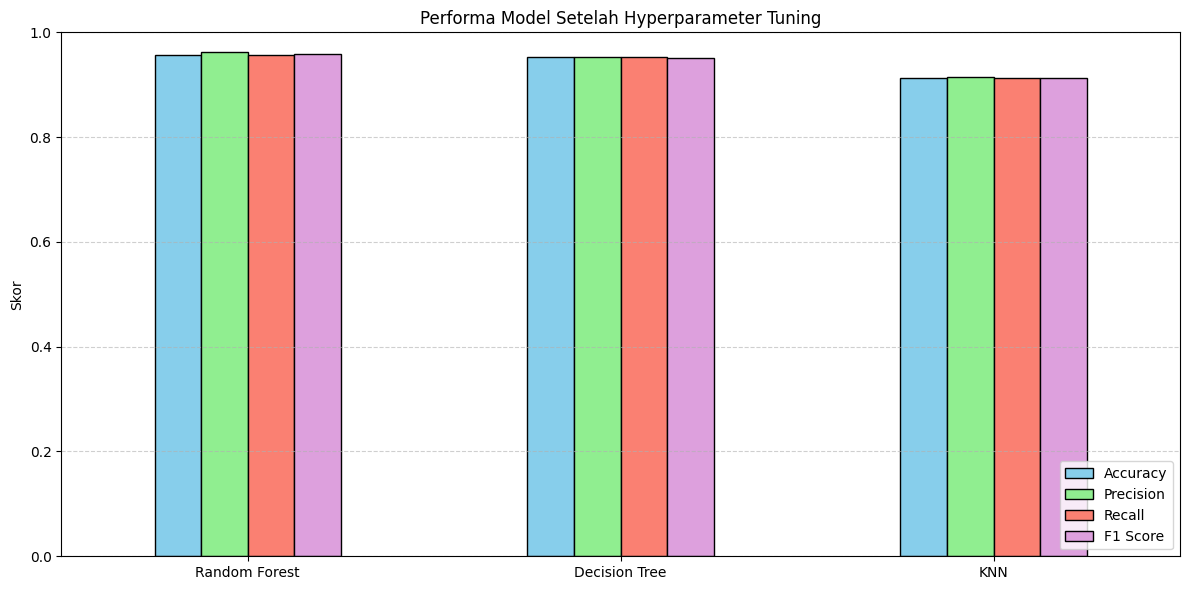

In [ ]:

# Visualisasi hasil tuning
tuned_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(
    kind='bar', color=['skyblue', 'lightgreen', 'salmon', 'plum'], edgecolor='black', figsize=(12, 6))
plt.title("Performa Model Setelah Hyperparameter Tuning")
plt.ylabel("Skor")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()



 Penjelasan:

  Dari hasil evaluasi dan visualisasi performa model, ketiga model (Random Forest, KNN, dan Decision Tree) menunjukkan skor akurasi, presisi, recall, dan F1 score yang cukup tinggi setelah hyperparameter tuning; namun, Random Forest (Tuned) menempati posisi terbaik dengan akurasi tertinggi sekaligus waktu pelatihan yang masih efisien, sehingga menjadi model paling optimal untuk klasifikasi pada dataset ini.

**Kesimpulan Tahap Hyperparameter Tuning:**

Setelah dilakukan tuning menggunakan GridSearchCV, semua model menunjukkan peningkatan performa, terutama pada Random Forest dan KNN. Akurasi, presisi, dan F1-score meningkat dibandingkan model default. Visualisasi menunjukkan bahwa tuning parameter berpengaruh signifikan dalam mengoptimalkan hasil klasifikasi. Dengan ini, Random Forest (tuned) menjadi model terbaik untuk prediksi tingkat obesitas pada dataset ini.

**KESIMPULAN AKHIR**

Setelah melalui proses EDA, preprocessing, pemodelan, dan hyperparameter tuning, dapat disimpulkan bahwa model Random Forest yang telah dioptimasi merupakan model terbaik untuk memprediksi tingkat obesitas. Data telah dibersihkan dari nilai kosong, duplikasi, dan outlier, serta diubah ke bentuk numerik dan distandarisasi. Ketidakseimbangan kelas berhasil diatasi menggunakan SMOTE, sehingga model mampu mengenali berbagai kategori obesitas dengan lebih baik. Hasil evaluasi menunjukkan bahwa Random Forest menghasilkan skor akurasi, presisi, recall, dan F1-score yang paling tinggi dibandingkan Decision Tree dan KNN. Optimasi parameter lebih lanjut meningkatkan performa model. Dengan demikian, pendekatan ini terbukti efektif untuk mengklasifikasikan tingkat obesitas berdasarkan kebiasaan makan dan gaya hidup individu.